In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/Users/jerry/Desktop/6110/6110 as1/sales_data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05


In [4]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,942,945.000000,943.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2023-07-31
freq,30,112,NaN,NaN,2
mean,NaN,NaN,108.628011,10.200424,NaN
std,NaN,NaN,167.350086,3.247589,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.420000,8.000000,NaN
50%,NaN,NaN,64.640000,10.000000,NaN
75%,NaN,NaN,142.310000,12.000000,NaN


In [5]:
df2 = df.dropna()
df2

,Product,Region,Price,Units Sold,Sale Date
1,Product_40,Region_2,46.19,10.0,2022-01-02
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
5,Product_21,Region_8,15.76,20.0,2022-01-06
6,Product_31,Region_10,1.60,11.0,2022-01-07
...,...,...,...,...,...
1044,Product_39,Region_6,239.07,10.0,2023-05-18
1045,Product_42,Region_3,18.63,9.0,2023-07-10
1046,Product_4,Region_3,159.27,10.0,2024-07-14
1047,Product_43,Region_1,2.91,13.0,2023-08-17


In [6]:
df2=df2.rename(columns={'Units Sold':'Units_Sold'})
df2

,Product,Region,Price,Units_Sold,Sale Date
1,Product_40,Region_2,46.19,10.0,2022-01-02
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
5,Product_21,Region_8,15.76,20.0,2022-01-06
6,Product_31,Region_10,1.60,11.0,2022-01-07
...,...,...,...,...,...
1044,Product_39,Region_6,239.07,10.0,2023-05-18
1045,Product_42,Region_3,18.63,9.0,2023-07-10
1046,Product_4,Region_3,159.27,10.0,2024-07-14
1047,Product_43,Region_1,2.91,13.0,2023-08-17


In [7]:
df2['sales_total'] = df2['Price'] * df2['Units_Sold']
df2

,Product,Region,Price,Units_Sold,Sale Date,sales_total
1,Product_40,Region_2,46.19,10.0,2022-01-02,461.90
3,Product_6,Region_8,143.47,8.0,2022-01-04,1147.76
4,Product_44,Region_4,122.54,10.0,2022-01-05,1225.40
5,Product_21,Region_8,15.76,20.0,2022-01-06,315.20
6,Product_31,Region_10,1.60,11.0,2022-01-07,17.60
...,...,...,...,...,...,...
1044,Product_39,Region_6,239.07,10.0,2023-05-18,2390.70
1045,Product_42,Region_3,18.63,9.0,2023-07-10,167.67
1046,Product_4,Region_3,159.27,10.0,2024-07-14,1592.70
1047,Product_43,Region_1,2.91,13.0,2023-08-17,37.83


For Region

In [8]:
region_sum = df2.groupby('Region')['sales_total'].sum()
region_sum

Region
Region_1      63542.63
Region_10     73856.50
Region_2     113614.20
Region_3      55501.05
Region_4      56417.74
Region_5      84971.20
Region_6      75497.75
Region_7      76490.69
Region_8      88484.49
Region_9      67728.52
Name: sales_total, dtype: float64

In [9]:
region_sum.sort_values()

Region
Region_3      55501.05
Region_4      56417.74
Region_1      63542.63
Region_9      67728.52
Region_10     73856.50
Region_6      75497.75
Region_7      76490.69
Region_5      84971.20
Region_8      88484.49
Region_2     113614.20
Name: sales_total, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

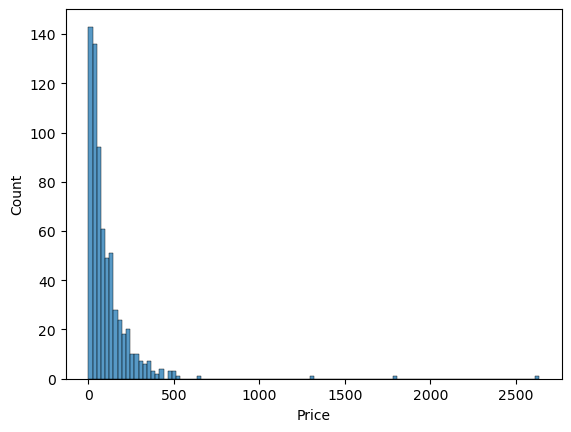

In [10]:
sns.histplot(df2['Price'])

In [11]:
df2 = df2.drop(df2[df2['Price'] > 750].index)

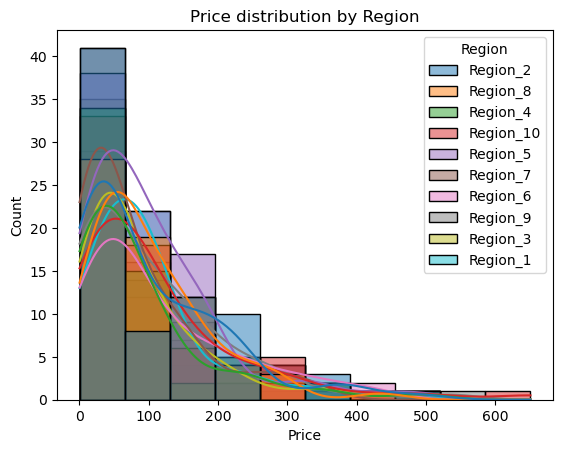

In [12]:
sns.histplot(data=df2, x='Price', bins=10, kde = True, hue='Region')
plt.title('Price distribution by Region')
plt.xlabel('Price')
plt.show()

<Axes: xlabel='Units_Sold', ylabel='Count'>

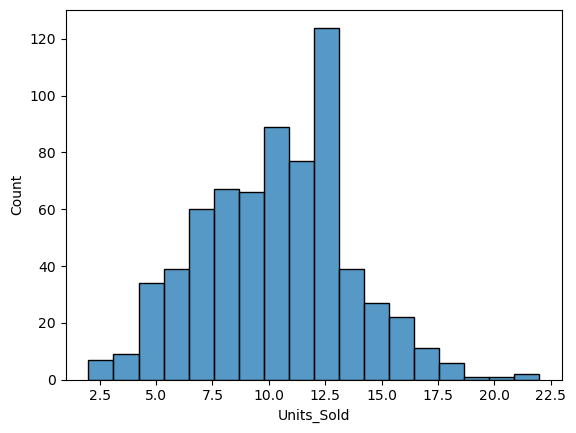

In [13]:
sns.histplot(df2['Units_Sold'])

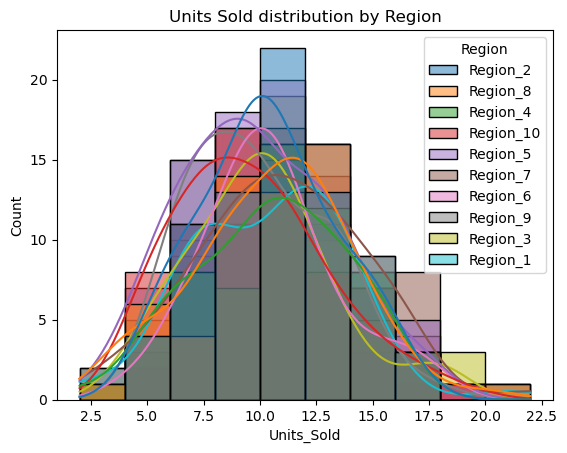

In [14]:
sns.histplot(data=df2, x='Units_Sold', kde = True, bins=10, hue='Region')
plt.title('Units Sold distribution by Region')
plt.xlabel('Units_Sold')
plt.show()

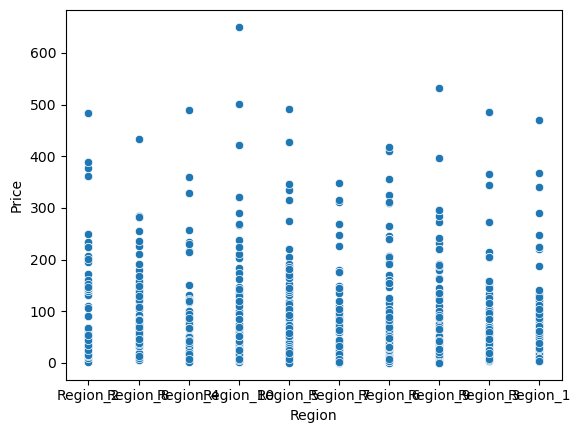

In [15]:
sns.scatterplot(x='Region', y='Price', data=df2)
plt.show()

For Product

In [16]:
product_sum = df2.groupby("Product")['sales_total'].sum()
product_sum

Product
Product_1     14172.36
Product_10    17379.50
Product_11    10614.82
Product_12    12372.72
Product_13    16349.31
Product_14    12337.86
Product_15    17168.71
Product_16     6585.22
Product_17    14806.21
Product_18    12630.18
Product_19    23649.83
Product_2      8416.42
Product_20    12593.34
Product_21    15864.49
Product_22    18989.90
Product_23    22440.43
Product_24    16067.23
Product_25     9175.79
Product_26    13035.64
Product_27    16514.45
Product_28    12925.32
Product_29     8233.59
Product_3     11346.56
Product_30    10508.08
Product_31    10597.18
Product_32     9068.62
Product_33     8115.03
Product_34    14188.35
Product_35     5377.20
Product_36    13182.63
Product_37    16746.60
Product_38    15647.71
Product_39    10986.79
Product_4     16019.61
Product_40    22267.28
Product_41     8169.72
Product_42    13563.29
Product_43    14102.53
Product_44     9443.56
Product_45    12973.49
Product_46    15698.59
Product_47     6176.23
Product_48     8269.41
Pro

In [17]:
product_sum.sort_values()

Product
Product_35     5377.20
Product_47     6176.23
Product_5      6437.69
Product_16     6585.22
Product_33     8115.03
Product_41     8169.72
Product_29     8233.59
Product_48     8269.41
Product_2      8416.42
Product_32     9068.62
Product_25     9175.79
Product_44     9443.56
Product_30    10508.08
Product_31    10597.18
Product_11    10614.82
Product_39    10986.79
Product_6     11282.32
Product_3     11346.56
Product_14    12337.86
Product_12    12372.72
Product_9     12568.01
Product_20    12593.34
Product_18    12630.18
Product_28    12925.32
Product_45    12973.49
Product_26    13035.64
Product_36    13182.63
Product_42    13563.29
Product_43    14102.53
Product_1     14172.36
Product_34    14188.35
Product_17    14806.21
Product_38    15647.71
Product_46    15698.59
Product_21    15864.49
Product_4     16019.61
Product_24    16067.23
Product_13    16349.31
Product_27    16514.45
Product_8     16629.41
Product_37    16746.60
Product_15    17168.71
Product_10    17379.50
Pro

In [18]:
data = {'Group': ['A', 'A', 'B', 'B', 'B'],
        'Value': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)
df.groupby('Group')['Value'].transform('mean')



0    1.5
1    1.5
2    4.0
3    4.0
4    4.0
Name: Value, dtype: float64

In [19]:
df.groupby('Group')['Value'].mean()

Group
A    1.5
B    4.0
Name: Value, dtype: float64